# **multiclass classification**, where each type of attack (e.g. DDoS, PortScan, Heartbleed) is treated as a separate class

In [1]:
import sys
import os
import joblib
sys.path.append(os.path.abspath(".."))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from utils.model_utils import *
from utils import data_preparation

In [4]:
data = data_preparation.load_dataset('../datasets/cic-ids2017_allattacks_multiclass_clean.csv')

Dataset loaded from: ../datasets/cic-ids2017_allattacks_multiclass_clean.csv — shape: (2574151, 9)


In [5]:
data.head()

,ack_flag,dst_port,fin_flag,flow_duration,psh_flag,syn_flag,bwd_pkts,fwd_pkts,attack_types
0,1,54865,0,3,0,0,0,2,BENIGN
1,1,55054,0,109,0,0,1,1,BENIGN
2,1,55055,0,52,0,0,1,1,BENIGN
3,1,46236,0,34,0,0,1,1,BENIGN
4,1,54863,0,3,0,0,0,2,BENIGN


In [6]:
data['attack_types'].value_counts()

attack_types
BENIGN                        2148273
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [7]:
le, data = encode_labels(data, 'attack_types')
class_names = le.classes_.tolist()

0: BENIGN
1: Bot
2: DDoS
3: DoS GoldenEye
4: DoS Hulk
5: DoS Slowhttptest
6: DoS slowloris
7: FTP-Patator
8: Heartbleed
9: Infiltration
10: PortScan
11: SSH-Patator
12: Web Attack � Brute Force
13: Web Attack � Sql Injection
14: Web Attack � XSS


In [8]:
joblib.dump(le, os.path.join("label_encoder.pkl"))

['label_encoder.pkl']

In [9]:
data.drop(columns=['attack_types'], inplace=True)

In [10]:
data.head()

,ack_flag,dst_port,fin_flag,flow_duration,psh_flag,syn_flag,bwd_pkts,fwd_pkts,attack_types_encoded
0,1,54865,0,3,0,0,0,2,0
1,1,55054,0,109,0,0,1,1,0
2,1,55055,0,52,0,0,1,1,0
3,1,46236,0,34,0,0,1,1,0
4,1,54863,0,3,0,0,0,2,0


In [11]:
X_train, X_test, y_train, y_test = split_data(data, label_column='attack_types_encoded')

# XGB

In [11]:
xgb_model = train_model(X_train, y_train, model_type='xgb')

=== Classification Report ===


C:\Users\Karol\miniconda3\envs\smarthome\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karol\miniconda3\envs\smarthome\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karol\miniconda3\envs\smarthome\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      1.00    644482
                       Bot       1.00      0.38      0.55       586
                      DDoS       0.93      0.92      0.93     38405
             DoS GoldenEye       0.85      0.84      0.84      3086
                  DoS Hulk       0.96      0.96      0.96     51855
          DoS Slowhttptest       0.95      0.95      0.95      1568
             DoS slowloris       0.97      0.97      0.97      1615
               FTP-Patator       1.00      1.00      1.00      1780
                Heartbleed       0.33      0.67      0.44         3
              Infiltration       1.00      0.18      0.31        11
                  PortScan       0.99      1.00      0.99     27246
               SSH-Patator       0.97      0.96      0.97       966
  Web Attack � Brute Force       0.83      0.07      0.12       441
Web Attack � Sql Injection       0.00      0.00

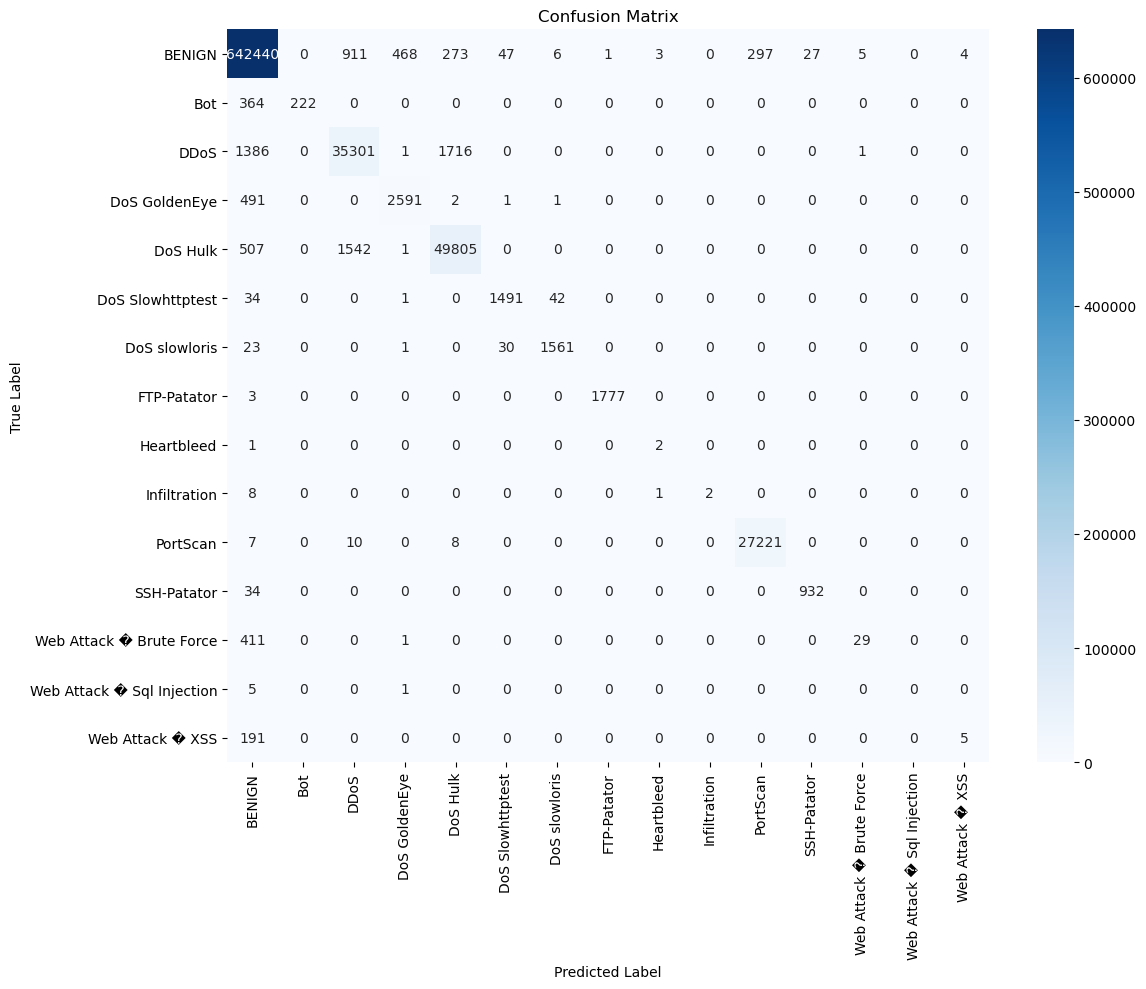

ROC AUC: 0.9973


In [37]:
evaluate_model(xgb_model, X_test, y_test, class_names, show_heatmap=True)

In [39]:
save_model(xgb_model, name="xgb_multiclass_v1.pkl")

Model saved to: C:\Users\Karol\inne\magisterka\threat-ml-trainer-main\utils\..\models\xgb_multiclass_v1.pkl


'C:\\Users\\Karol\\inne\\magisterka\\threat-ml-trainer-main\\utils\\..\\models\\xgb_multiclass_v1.pkl'

# Logistic regression 

In [38]:
lr_model = train_model(X_train, y_train, model_type='lr')

C:\Users\Karol\miniconda3\envs\smarthome\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Classification Report ===


C:\Users\Karol\miniconda3\envs\smarthome\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karol\miniconda3\envs\smarthome\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Karol\miniconda3\envs\smarthome\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.83      1.00      0.91    644482
                       Bot       0.00      0.00      0.00       586
                      DDoS       0.00      0.00      0.00     38405
             DoS GoldenEye       0.00      0.00      0.00      3086
                  DoS Hulk       0.00      0.00      0.00     51855
          DoS Slowhttptest       0.00      0.00      0.00      1568
             DoS slowloris       0.00      0.00      0.00      1615
               FTP-Patator       0.00      0.00      0.00      1780
                Heartbleed       0.00      0.00      0.00         3
              Infiltration       0.00      0.00      0.00        11
                  PortScan       0.00      0.00      0.00     27246
               SSH-Patator       0.00      0.00      0.00       966
  Web Attack � Brute Force       0.00      0.00      0.00       441
Web Attack � Sql Injection       0.00      0.00

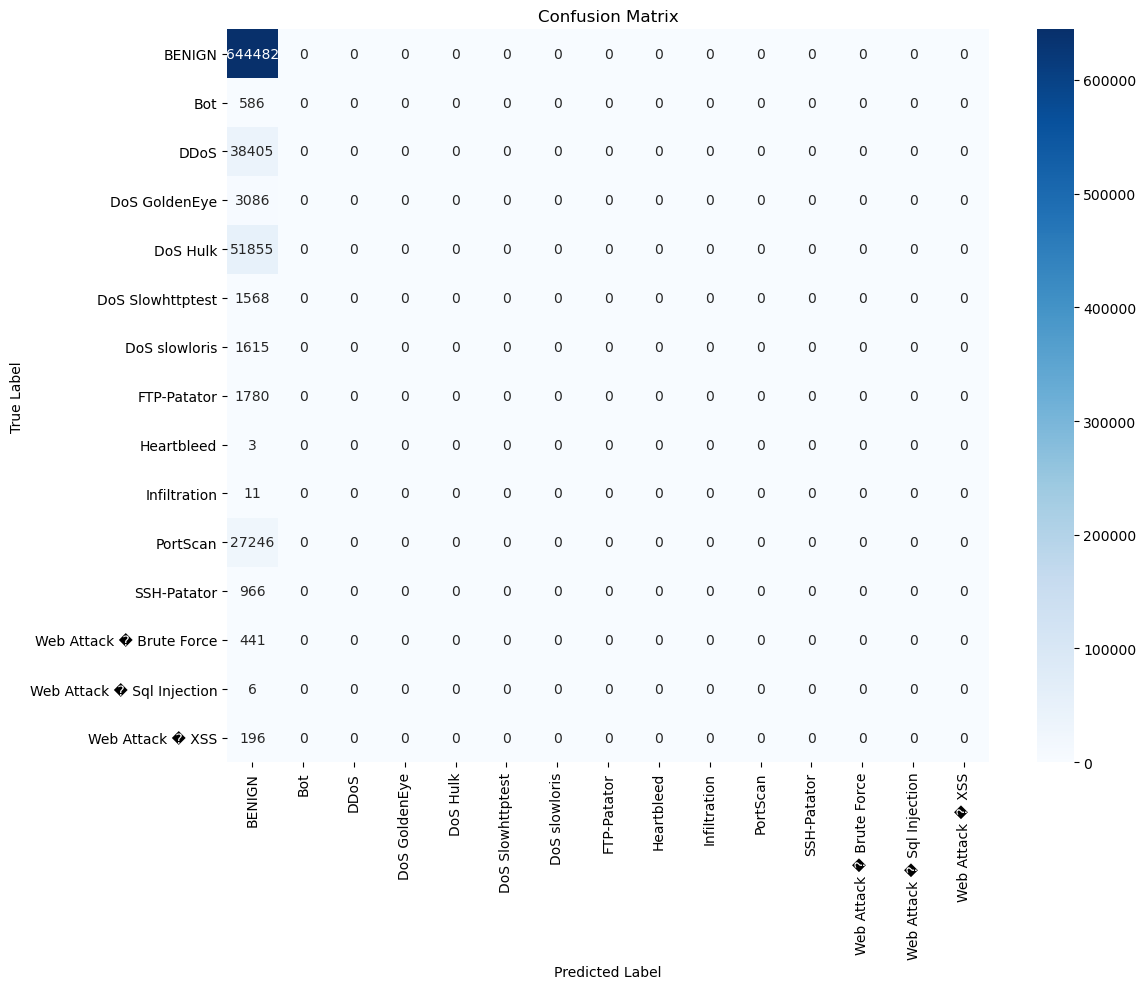

ROC AUC: 0.4465


In [41]:
evaluate_model(lr_model, X_test, y_test, class_names, show_heatmap=True)

In [42]:
save_model(lr_model, name="lr_multiclass_v1.pkl")

Model saved to: C:\Users\Karol\inne\magisterka\threat-ml-trainer-main\utils\..\models\lr_multiclass_v1.pkl


'C:\\Users\\Karol\\inne\\magisterka\\threat-ml-trainer-main\\utils\\..\\models\\lr_multiclass_v1.pkl'

# RANDOM FOREST

In [43]:
rf_model = train_model(X_train, y_train, model_type='rf')

=== Classification Report ===
                            precision    recall  f1-score   support

                    BENIGN       0.99      0.99      0.99    644482
                       Bot       0.67      0.57      0.61       586
                      DDoS       0.92      0.92      0.92     38405
             DoS GoldenEye       0.89      0.89      0.89      3086
                  DoS Hulk       0.96      0.96      0.96     51855
          DoS Slowhttptest       0.95      0.95      0.95      1568
             DoS slowloris       0.98      0.96      0.97      1615
               FTP-Patator       1.00      1.00      1.00      1780
                Heartbleed       1.00      0.67      0.80         3
              Infiltration       0.88      0.64      0.74        11
                  PortScan       0.99      0.99      0.99     27246
               SSH-Patator       0.98      0.95      0.96       966
  Web Attack � Brute Force       0.18      0.19      0.18       441
Web Attack � Sql 

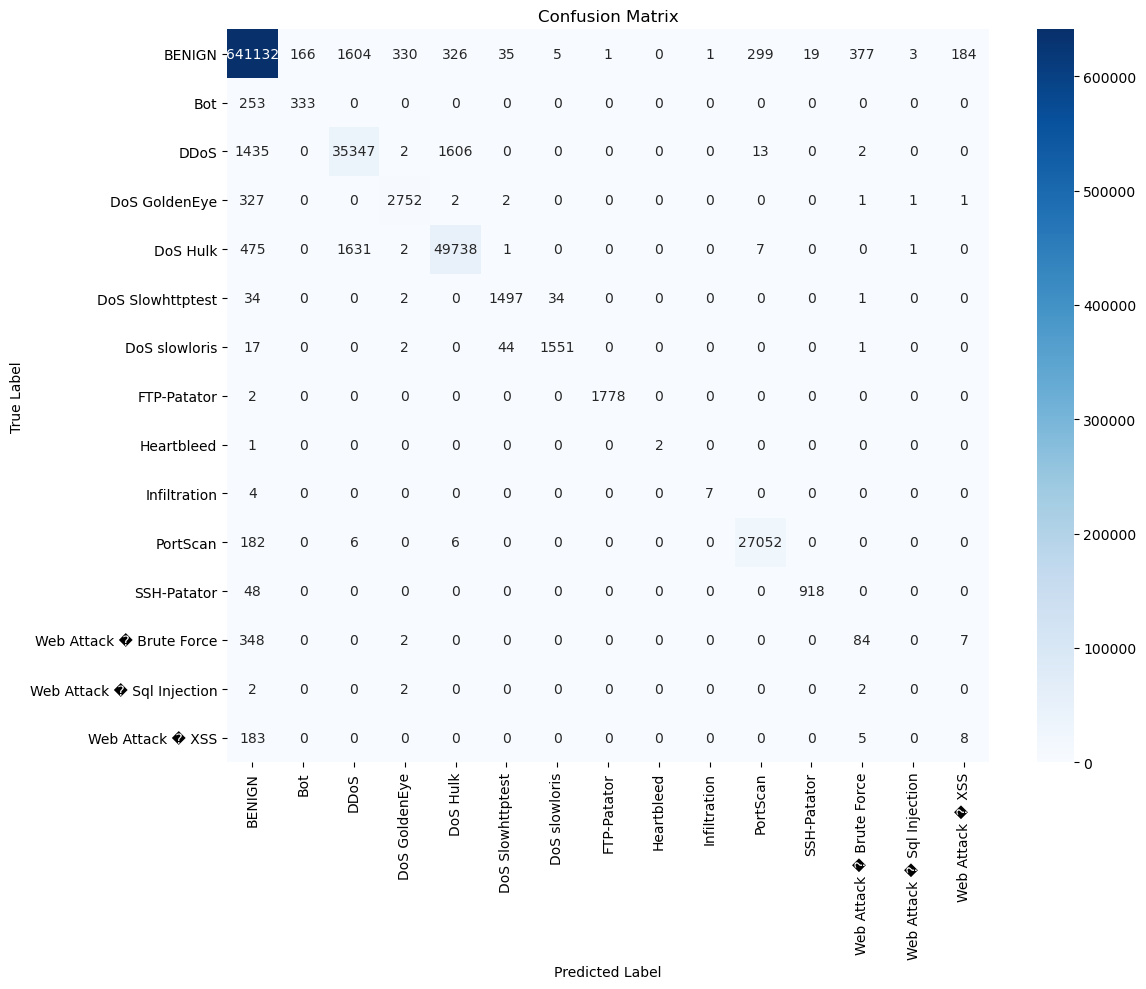

ROC AUC: 0.9145


In [44]:
evaluate_model(rf_model, X_test, y_test, class_names, show_heatmap=True)

In [45]:
save_model(rf_model, name="rf_multiclass_v1.pkl")

Model saved to: C:\Users\Karol\inne\magisterka\threat-ml-trainer-main\utils\..\models\rf_multiclass_v1.pkl


'C:\\Users\\Karol\\inne\\magisterka\\threat-ml-trainer-main\\utils\\..\\models\\rf_multiclass_v1.pkl'

# UNSUPERVISED

In [12]:
benign_data, attack_data = prepare_anomaly_data(data)
X_train = benign_data.drop(columns=['attack_types_encoded'])

X_test = pd.concat([benign_data.sample(5000), attack_data]).drop(columns=['attack_types_encoded'])
y_test = [0]*5000 + [1]*len(attack_data)

# Isolation Forest unsupervised anomaly detection

In [15]:
model_isof = train_model(X_train, None, model_type='isof')

In [16]:
evaluate_model(model_isof, X_test, y_test)

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.01      0.99      0.03      5000
           1       1.00      0.12      0.21    425878

    accuracy                           0.13    430878
   macro avg       0.51      0.55      0.12    430878
weighted avg       0.99      0.13      0.21    430878

=== Confusion Matrix ===
[[  4950     50]
 [374786  51092]]
Model does not support probability prediction.


In [17]:
save_model(model_isof, name="isof_multiclass_v1.pkl")

Model saved to: C:\Users\Karol\inne\magisterka\threat-ml-trainer-main\utils\..\models\isof_multiclass_v1.pkl


'C:\\Users\\Karol\\inne\\magisterka\\threat-ml-trainer-main\\utils\\..\\models\\isof_multiclass_v1.pkl'

# Autoencoder unsupervised deep learning

In [19]:
model_ae = train_model(X_train, None, model_type='ae', epochs=10, batch_size=128)

In [20]:
evaluate_model(model_ae, X_test, y_test)

13465/13465 ━━━━━━━━━━━━━━━━━━━━ 10s 727us/step
=== Classification Report ===
              precision    recall  f1-score   support

           0       0.01      1.00      0.02      5000
           1       0.00      0.00      0.00    425878

    accuracy                           0.01    430878
   macro avg       0.01      0.50      0.01    430878
weighted avg       0.00      0.01      0.00    430878

=== Confusion Matrix ===
[[  5000      0]
 [425878      0]]
Model does not support probability prediction.


C:\Users\Karol\miniconda3\envs\tf-clean\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Karol\miniconda3\envs\tf-clean\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Karol\miniconda3\envs\tf-clean\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

In [ ]:
save_model(model_ae, name="ae_multiclass_v1.pkl")